# Houses to Rent - Regressão linear em dados brasileiros

De um [dataset do Kaggle](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent)

## Carregamento das bibliotecas necessárias

In [55]:
import pandas as pd
import numpy as np
import re, string
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels

from pylab import rcParams
rcParams['figure.figsize'] = 19, 9

## Carregamento dos dados

In [2]:
df = pd.read_csv('houses_to_rent.csv', index_col=0)

## Exploração dos dados

### Dicionário de dados do Kaggle

* `id`
* `city` Cidade onde o imóvel está localizada / City where the property is located
* `area` Area do imovel / Property area
* `rooms` Numero de quartos/ Quantity of rooms
* `bathroom` Numero de banheiros / Quantity of bathroom
* `parking spaces` Numero de vagas / Quantity of parking spaces
* `floor` Andar / Floor
* `animal` Aceita animais? / Acept animals?
* `furniture` Mobilhada? / Furniture?
* `hoa` Valor do condominio / Homeowners association tax
* `rent amount` Valor do Aluguel / Rent amount
* `property tax` IPTU / Property tax
* `fire` insurance Seguro Incendio / Fire Insurance
* `total` Valor total / Total

### `head()`

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


### `info()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


### `describe()`

In [5]:
df.describe()

,city,area,rooms,bathroom,parking spaces
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250
std,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


### `dtypes`

In [6]:
df.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

## Transformações

### Nomes das colunas

In [7]:
new_column_names = [re.sub(r"[^a-zA-Z0-9]+", '_', k) for k in df.columns]
df.columns = new_column_names

In [8]:
new_column_names

['city',
 'area',
 'rooms',
 'bathroom',
 'parking_spaces',
 'floor',
 'animal',
 'furniture',
 'hoa',
 'rent_amount',
 'property_tax',
 'fire_insurance',
 'total']

### `floor`

In [9]:
df.floor.head()

0     -
1    10
2     3
3    12
4     -
Name: floor, dtype: object

In [10]:
df.floor = df.floor.replace({'-': 0})
df.floor = df.floor.astype('int')

### `animal`

In [11]:
df.animal.head()

0        acept
1        acept
2        acept
3        acept
4    not acept
Name: animal, dtype: object

In [12]:
set(df.animal)

{'acept', 'not acept'}

In [13]:
df.animal = df.animal.replace({'not acept': 0, 'acept': 1})
df.animal = df.animal.astype('int')

### `furniture`

In [14]:
df.furniture.head()

0        furnished
1    not furnished
2        furnished
3    not furnished
4    not furnished
Name: furniture, dtype: object

In [15]:
set(df.furniture)

{'furnished', 'not furnished'}

In [16]:
df.furniture = df.furniture.replace({'not furnished': 0, 'furnished': 1})
df.furniture = df.furniture.astype('int')

### `hoa`

In [17]:
df.hoa.head()

0        R$0
1      R$540
2    R$4,172
3      R$700
4        R$0
Name: hoa, dtype: object

In [18]:
df.hoa = df.hoa.str.replace(r'\D+', '').replace({'': 0}).astype('int')

### `rent amount`

In [19]:
df.rent_amount.head()

0    R$8,000
1      R$820
2    R$7,000
3    R$1,250
4    R$1,200
Name: rent_amount, dtype: object

In [20]:
df.rent_amount = df.rent_amount.str.replace(r'\D+', '').replace({
    '': 0
}).astype('int')

### `property tax`

In [21]:
df.property_tax.head()

0    R$1,000
1      R$122
2    R$1,417
3      R$150
4       R$41
Name: property_tax, dtype: object

In [22]:
df.property_tax = df.property_tax.str.replace(r'\D+', '').replace({
    '': 0
}).astype('int')

### `fire insurance`

In [23]:
df.fire_insurance.head()

0    R$121
1     R$11
2     R$89
3     R$16
4     R$16
Name: fire_insurance, dtype: object

In [24]:
df.fire_insurance = df.fire_insurance.str.replace(r'\D+', '').replace({
    '': 0
}).astype('int')

### `total`

In [25]:
df.total.head()

0     R$9,121
1     R$1,493
2    R$12,680
3     R$2,116
4     R$1,257
Name: total, dtype: object

In [26]:
df.total = df.total.str.replace(r'\D+', '').replace({'': 0}).astype('int')

In [27]:
df.dtypes

city              int64
area              int64
rooms             int64
bathroom          int64
parking_spaces    int64
floor             int32
animal            int32
furniture         int32
hoa               int32
rent_amount       int32
property_tax      int32
fire_insurance    int32
total             int32
dtype: object

## Feature engineering

### Explorando variáveis

#### `rent_amount`

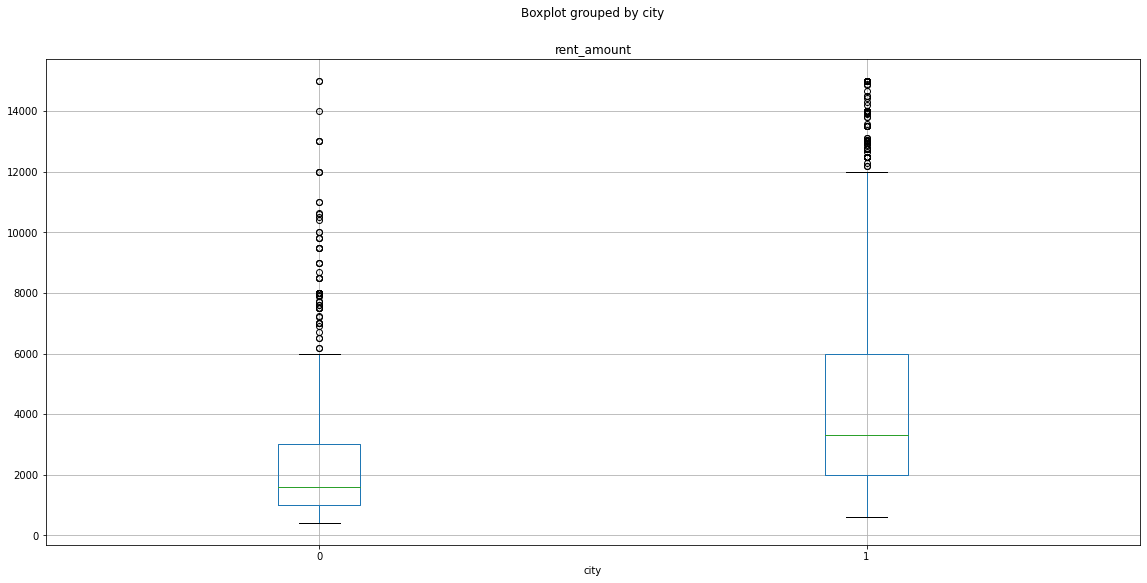

In [61]:
df.boxplot(column='rent_amount', by='city')

#### `total`

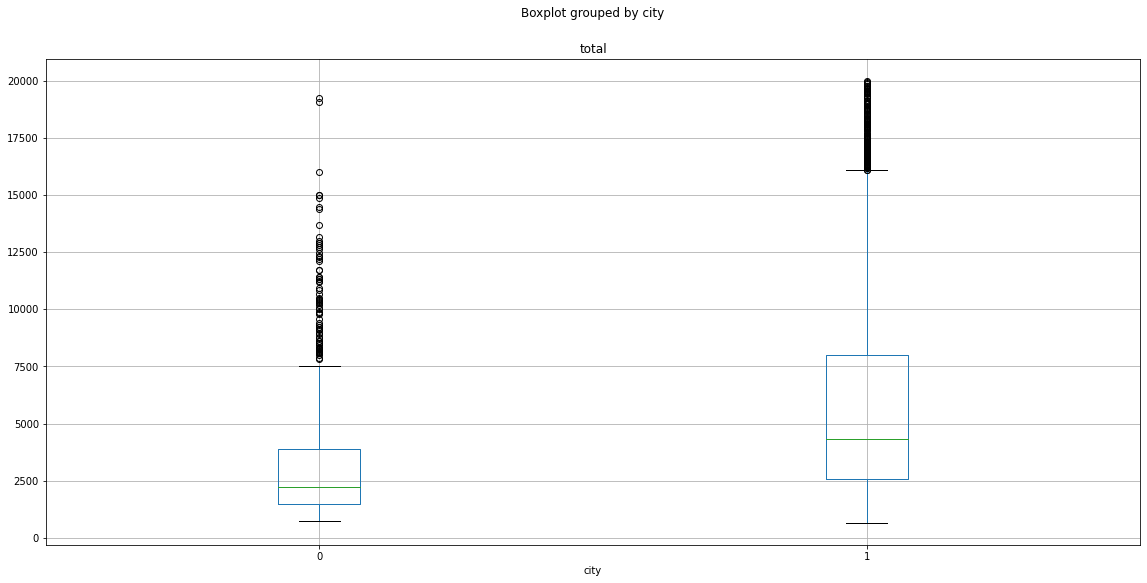

In [60]:
df.boxplot(column='total', by='city')

#### `hoa`

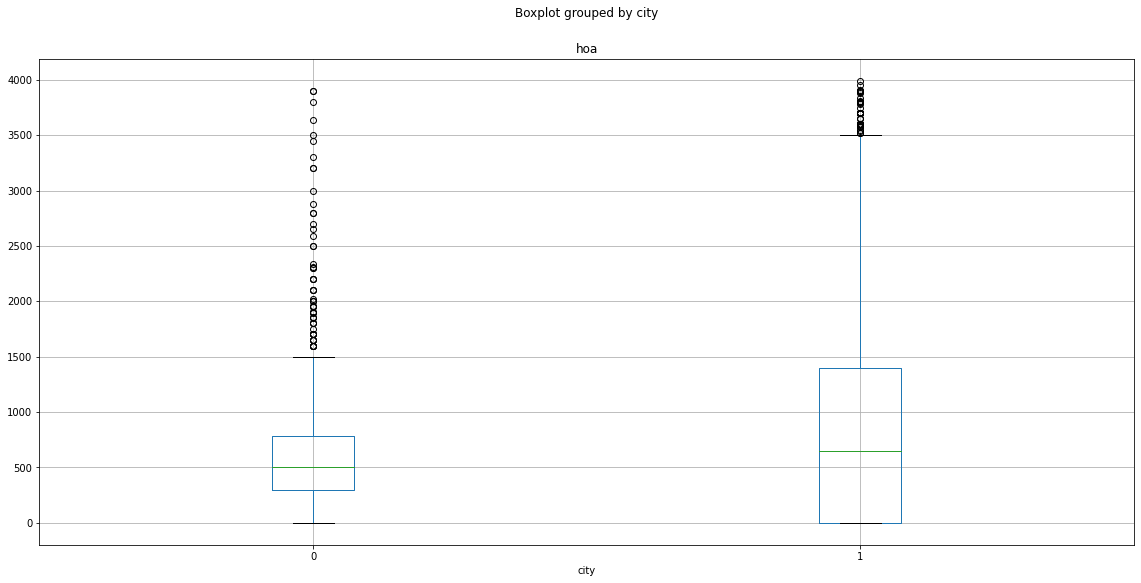

In [59]:
df.boxplot(column='hoa', by='city')

#### `property tax`

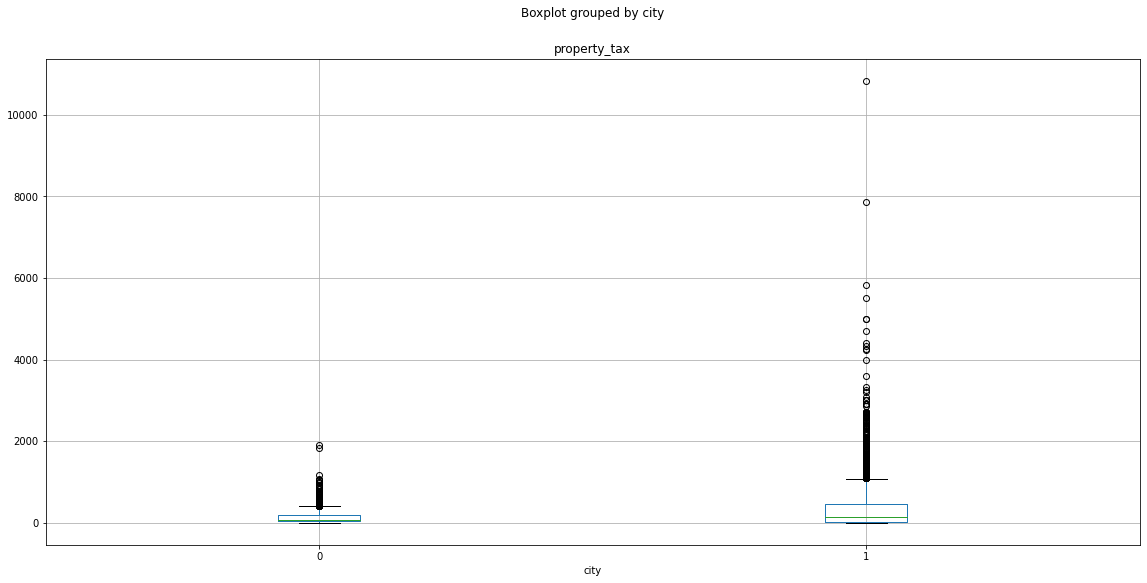

In [62]:
df.boxplot(column='property_tax', by='city')

#### `fire insurance`

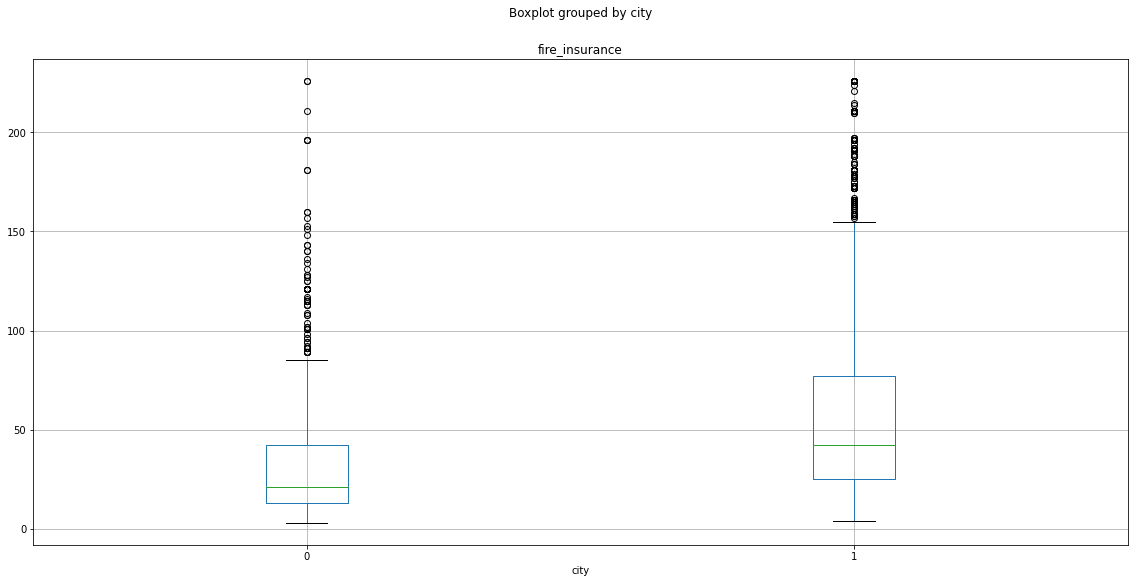

In [63]:
df.boxplot(column='fire_insurance', by='city')

### Removendo outliers

In [65]:
df = df[np.logical_and(df.total < 20000, df.hoa < 4000)]
df = df[df.property_tax < 6000]

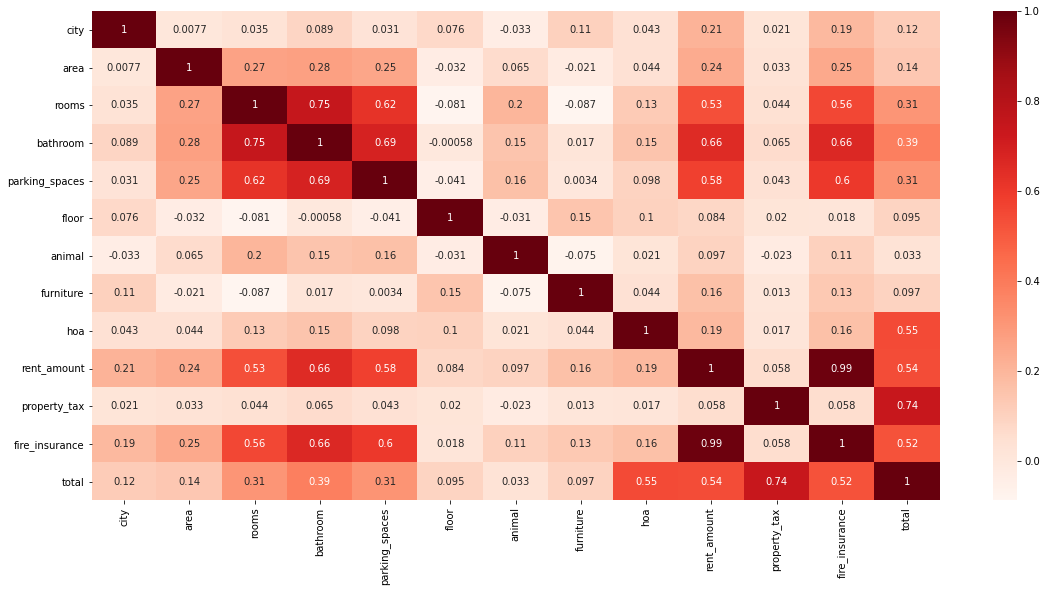

In [32]:
plt.figure()
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
cor_target = abs(cor.total)
relevant_features = cor_target[cor_target > 0.54]

In [30]:
relevant_features

hoa             0.546404
rent_amount     0.542891
property_tax    0.741742
total           1.000000
Name: total, dtype: float64